## **Training job skill extraction model**

In [1]:
colab_used = True

if colab_used:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
input_path_colab = "/content/drive/MyDrive/SFU/CMPT733/project/processing/"
input_path_lab = "processing/"

input_path = input_path_colab if colab_used else input_path_lab

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn import metrics

In [4]:
# Predictions were made on a data scientist job description from linkedin
predictions1 = pd.read_csv(input_path+'predictions1_v2.csv')
predictions1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       238 non-null    int64  
 1   extractions      238 non-null    object 
 2   actual           238 non-null    int64  
 3   possibility      238 non-null    int64  
 4   prediction_prob  238 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 9.4+ KB


In [5]:
# Predictions made on a sales associate job description from linkedin
predictions2 = pd.read_csv(input_path+'predictions2_v2.csv')
predictions2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       249 non-null    int64  
 1   extractions      249 non-null    object 
 2   actual           249 non-null    int64  
 3   possibility      249 non-null    int64  
 4   prediction_prob  249 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 9.9+ KB


In [6]:
# Converts the probability with a threshold of 50% creating a new column for better analysis
predictions1['predicted_skill'] = (predictions1['prediction_prob'] >= 0.5).astype('int8')
predictions2['predicted_skill'] = (predictions2['prediction_prob'] >= 0.5).astype('int8')

In [7]:
# There is a difference in column names 
predictions2.columns

Index(['Unnamed: 0', 'extractions', 'actual', 'possibility', 'prediction_prob',
       'predicted_skill'],
      dtype='object')

### Job Description Predictions for Data Scientist

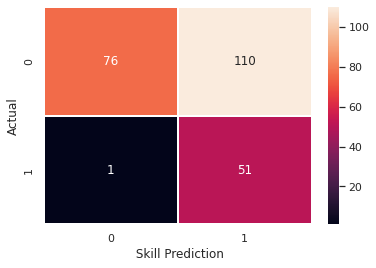

In [8]:
confusion_matrix = pd.crosstab(predictions1.actual, predictions1.predicted_skill, rownames = ['Actual'], colnames = [' Skill Prediction'])
sns.heatmap(confusion_matrix, linewidths = 1, fmt= 'g', annot=True)

Text(0.5, 1.0, 'ROC Curve')

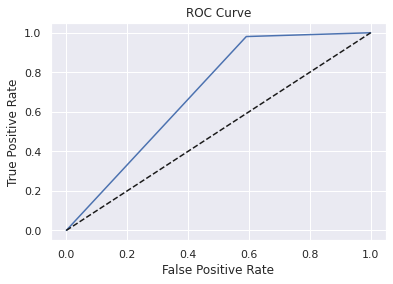

In [9]:
fpr, tpr, thresholds =  metrics.roc_curve(predictions1.actual, predictions1.predicted_skill)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve')

(0.0, 1.0)

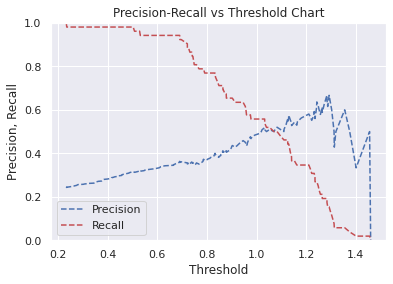

In [10]:
# Check the trhesholds and see of there is a chance in alteration for better accuracy
precision, recall, thresholds = metrics.precision_recall_curve(predictions1.actual, predictions1.prediction_prob) 
 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

Text(0, 0.5, 'Phrases Count')

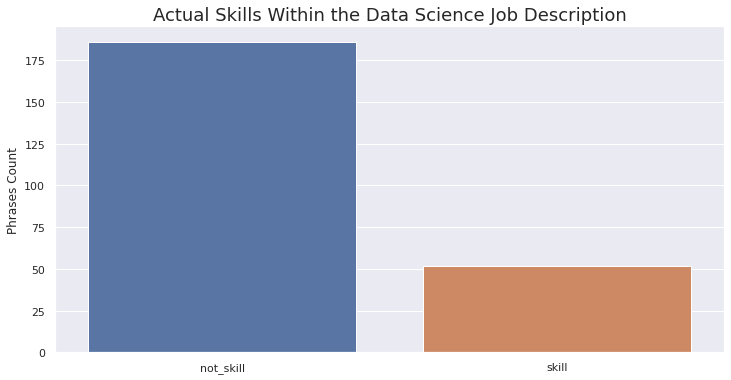

In [11]:
# Number of actual skills in the job description 
predictions1['actual_cat'] = np.where(predictions1.actual == 1, 'skill', 'not_skill')
plt.figure(figsize = (12,6))
sns.barplot(x = predictions1.actual_cat.value_counts().index, y = predictions1.actual_cat.value_counts())
plt.title('Actual Skills Within the Data Science Job Description', size = 18)
plt.ylabel('Phrases Count')

In [12]:
# Good examples
predictions1.extractions.loc[predictions1.predicted_skill == 1]

0              the hr data science analyst implements
1                                    analytics models
2                                           solutions
3                               prescriptive insights
4                                                data
                            ...                      
228                                          sampling
230                                          existing
234                                      discriminate
236                 direction , business objectives ,
237    data science , analytics , operations research
Name: extractions, Length: 161, dtype: object

In [13]:
# Flagged Instances; those that were on the border/ questionable
predictions1.loc[predictions1.possibility == 1]

,Unnamed: 0,extractions,actual,possibility,prediction_prob,predicted_skill,actual_cat
1,1,analytics models,1,1,1.292091,1,skill
3,3,prescriptive insights,0,1,0.830595,1,not_skill
7,7,research,0,1,0.571464,1,not_skill
14,14,predictive solutions,0,1,1.238093,1,not_skill
16,16,runs models,1,1,0.233276,0,skill
23,23,code,0,1,0.319782,0,not_skill
27,27,correlation,0,1,0.683420,1,not_skill
28,28,classification,0,1,0.588211,1,not_skill
33,33,production system performance/integrity,0,1,1.459486,1,not_skill
39,39,present information,0,1,0.829655,1,not_skill


### Checking the decisiveness of the model - Probability Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Probability Distributioin to Determine Decisiveness')

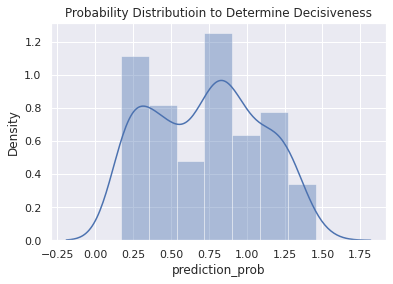

In [14]:
# Checking the decisiveness of the model
sns.distplot(predictions1.prediction_prob);
plt.title('Probability Distributioin to Determine Decisiveness')

In [15]:
# Low probabilities; those the model were not very sure of 
predictions1.loc[(predictions1.prediction_prob > .49) & (predictions1.prediction_prob < .75)]

,Unnamed: 0,extractions,actual,possibility,prediction_prob,predicted_skill,actual_cat
0,0,the hr data science analyst implements,1,0,0.743218,1,skill
2,2,solutions,0,0,0.675158,1,not_skill
7,7,research,0,1,0.571464,1,not_skill
15,15,the hr data science analyst builds,1,0,0.743218,1,skill
27,27,correlation,0,1,0.683420,1,not_skill
28,28,classification,0,1,0.588211,1,not_skill
31,31,procedures,0,0,0.558273,1,not_skill
40,40,fact-based decision making,1,0,0.721015,1,skill
44,44,impactful visualizations,1,0,0.738500,1,skill
54,54,skills identifies,0,0,0.721038,1,not_skill


### Job Descriptions Predictions for Sales Associate

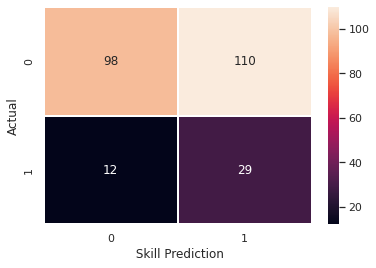

In [16]:
confusion_matrix = pd.crosstab(predictions2.actual, predictions2.predicted_skill, rownames = ['Actual'], colnames = [' Skill Prediction'])
sns.heatmap(confusion_matrix, linewidths = 1, fmt= 'g', annot=True);

In [17]:
print(metrics.classification_report(predictions2.actual, predictions2.predicted_skill))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62       208
           1       0.21      0.71      0.32        41

    accuracy                           0.51       249
   macro avg       0.55      0.59      0.47       249
weighted avg       0.78      0.51      0.57       249



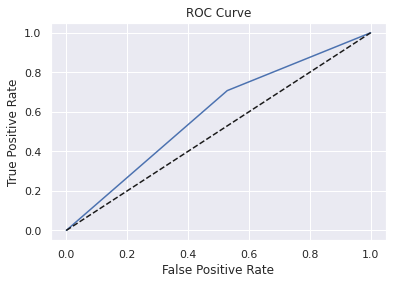

In [18]:
fpr, tpr, thresholds =  metrics.roc_curve(predictions2.actual, predictions2.predicted_skill)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve');

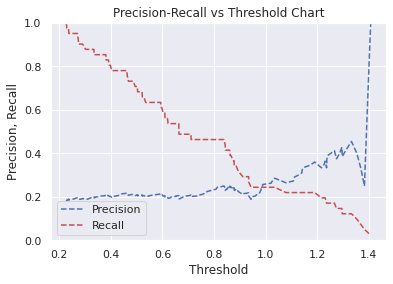

In [19]:
# Check the trhesholds and see of there is a chance in alteration for better accuracy
precision, recall, thresholds = metrics.precision_recall_curve(predictions2.actual, predictions2.prediction_prob) 
 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1]);

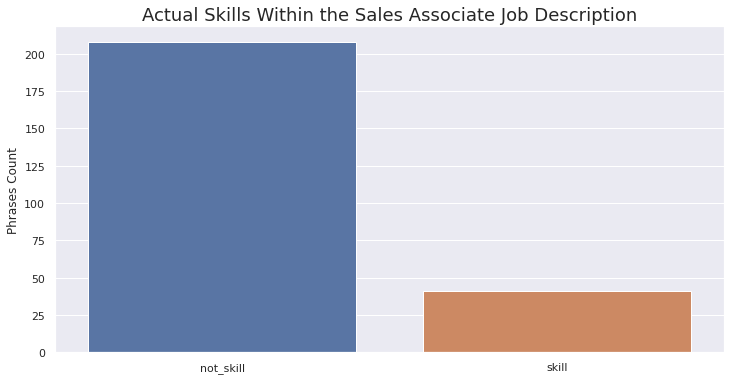

In [20]:
# Number of actual skills in the job description 
predictions2['actual_cat'] = np.where(predictions2.actual == 1, 'skill', 'not_skill')
plt.figure(figsize = (12,6))
sns.barplot(x = predictions2.actual_cat.value_counts().index, y = predictions2.actual_cat.value_counts())
plt.title('Actual Skills Within the Sales Associate Job Description', size = 18)
plt.ylabel('Phrases Count');

### Altered threshold for improvement

For Sales Associate

In [21]:
predictions2['altered_threshold'] = (predictions2['prediction_prob'] >= 0.8).astype('int8')

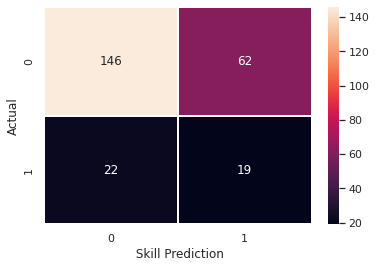

In [22]:
confusion_matrix = pd.crosstab(predictions2.actual, predictions2.altered_threshold, rownames = ['Actual'], colnames = [' Skill Prediction'])
sns.heatmap(confusion_matrix, linewidths = 1, fmt= 'g', annot=True);

In [23]:
print(metrics.classification_report(predictions2.actual, predictions2.altered_threshold))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78       208
           1       0.23      0.46      0.31        41

    accuracy                           0.66       249
   macro avg       0.55      0.58      0.54       249
weighted avg       0.76      0.66      0.70       249



Text(0.5, 1.0, 'ROC Curve')

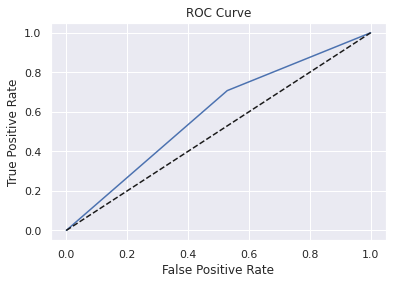

In [24]:
fpr, tpr, thresholds =  metrics.roc_curve(predictions2.actual, predictions2.predicted_skill)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve')

In [25]:
# Good examples
predictions2.extractions.loc[predictions2.predicted_skill == 1]

0                           the sales associate
1                     a customer-oriented sales
2                              ample experience
3                        maintenance agreements
4                        refrigeration industry
                         ...                   
232                            control circuits
235                                       adapt
238                                  hvac sales
246    service agreements , repairs , equipment
247           communication , problem solving ,
Name: extractions, Length: 139, dtype: object

In [26]:
# Flagged Instances; those that were on the border/ questionable
predictions1.loc[predictions1.possibility == 1]

,Unnamed: 0,extractions,actual,possibility,prediction_prob,predicted_skill,actual_cat
1,1,analytics models,1,1,1.292091,1,skill
3,3,prescriptive insights,0,1,0.830595,1,not_skill
7,7,research,0,1,0.571464,1,not_skill
14,14,predictive solutions,0,1,1.238093,1,not_skill
16,16,runs models,1,1,0.233276,0,skill
23,23,code,0,1,0.319782,0,not_skill
27,27,correlation,0,1,0.683420,1,not_skill
28,28,classification,0,1,0.588211,1,not_skill
33,33,production system performance/integrity,0,1,1.459486,1,not_skill
39,39,present information,0,1,0.829655,1,not_skill


For Data Scientist

In [27]:
predictions1['altered_threshold'] = (predictions1['prediction_prob'] >= 0.7).astype('int8')

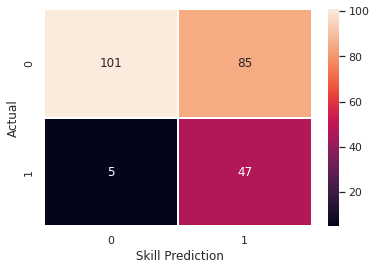

In [28]:
confusion_matrix = pd.crosstab(predictions1.actual, predictions1.altered_threshold, rownames = ['Actual'], colnames = [' Skill Prediction'])
sns.heatmap(confusion_matrix, linewidths = 1, fmt= 'g', annot=True);

In [29]:
print(metrics.classification_report(predictions1.actual, predictions1.altered_threshold))

              precision    recall  f1-score   support

           0       0.95      0.54      0.69       186
           1       0.36      0.90      0.51        52

    accuracy                           0.62       238
   macro avg       0.65      0.72      0.60       238
weighted avg       0.82      0.62      0.65       238



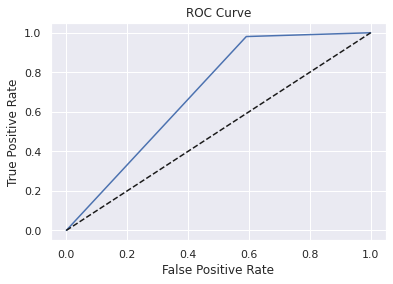

In [30]:
fpr, tpr, thresholds =  metrics.roc_curve(predictions1.actual, predictions1.predicted_skill)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve');

In [31]:
# Good examples
predictions1.extractions.loc[predictions1.predicted_skill == 1]

0              the hr data science analyst implements
1                                    analytics models
2                                           solutions
3                               prescriptive insights
4                                                data
                            ...                      
228                                          sampling
230                                          existing
234                                      discriminate
236                 direction , business objectives ,
237    data science , analytics , operations research
Name: extractions, Length: 161, dtype: object

### Checking the decisiveness of the model - Probability Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


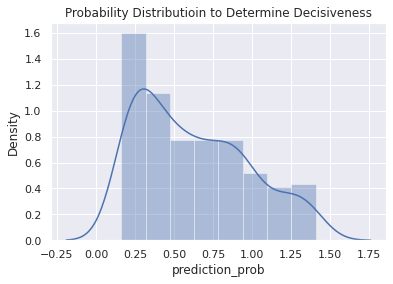

In [32]:
# Checking the decisiveness of the model
sns.distplot(predictions2.prediction_prob);
plt.title('Probability Distributioin to Determine Decisiveness');

In [33]:
# Low probabilities; those the model were not very sure of 
predictions2.loc[(predictions2.prediction_prob > .49) & (predictions2.prediction_prob < .75)]

,Unnamed: 0,extractions,actual,possibility,prediction_prob,predicted_skill,actual_cat,altered_threshold
1,1,a customer-oriented sales,1,0,0.609241,1,skill,0
4,4,refrigeration industry,1,0,0.597585,1,skill,0
21,21,growth,0,0,0.585011,1,not_skill,0
26,26,warm calls,0,0,0.595965,1,not_skill,0
28,28,intention,0,0,0.503341,1,not_skill,0
36,36,interface,0,0,0.503608,1,not_skill,0
39,39,solutions,0,0,0.675158,1,not_skill,0
55,55,competitors,0,0,0.651968,1,not_skill,0
58,58,the branch,0,0,0.518012,1,not_skill,0
61,61,problem solving,1,0,0.710518,1,skill,0
